<a href="https://colab.research.google.com/github/mrtkp9993/QuantitaveFinanceExamplesPy/blob/main/07_VWAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import pandas_ta as ta
import seaborn as sns
import yfinance as yf

In [3]:
data = yf.download(
    "ENKAI.IS", period="max", interval="5m", start="2021-08-01"
)  # Start date must be within the last 60 days for 5m frequency.
data.drop(["Close"], axis=1, inplace=True)
data.rename(columns={"Adj Close": "Close"}, inplace=True)
data.index.name = "Date"
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2021-08-02 09:55:00+03:00,9.22,9.22,9.22,9.22,0
2021-08-02 10:00:00+03:00,9.23,9.24,9.20,9.22,49094
2021-08-02 10:05:00+03:00,9.22,9.23,9.21,9.22,26995
2021-08-02 10:10:00+03:00,9.22,9.22,9.21,9.22,24495
2021-08-02 10:15:00+03:00,9.21,9.23,9.20,9.20,6393
...,...,...,...,...,...
2021-08-31 17:10:00+03:00,10.99,11.00,10.98,10.98,8764
2021-08-31 17:15:00+03:00,10.98,10.98,10.94,10.95,35243
2021-08-31 17:20:00+03:00,10.96,10.96,10.88,10.90,139456


In [4]:
vwap = data.ta.vwap()

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



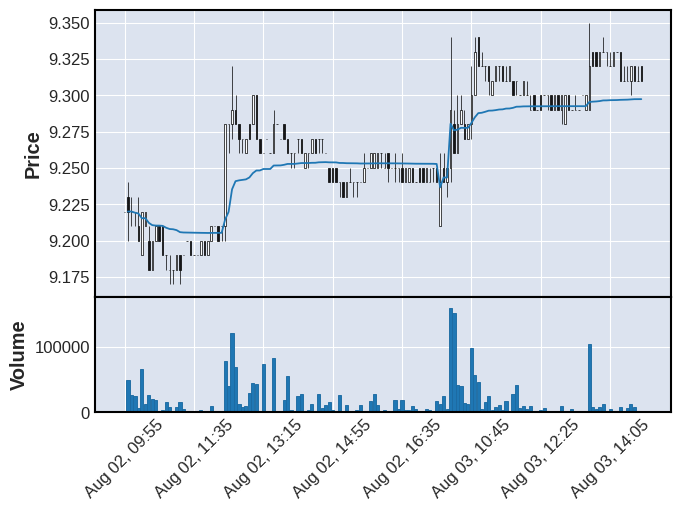

In [5]:
n = 150
mpf.plot(data.iloc[:n], volume=True, type="candle", addplot=mpf.make_addplot(vwap[:n]))